In [11]:
# Importa le librerie necessarie
import pandas as pd
import processing_text as pt
import metrics as mx
import dispersion

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding, LSTM, GRU, Dense, Dropout
from keras.optimizers import Adam
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from imblearn.over_sampling import SMOTE

In [12]:
# Carica il dataset
X_train = pd.read_csv("haggingface/train.csv")
X_train = X_train.sample(n=1000, random_state=42)

In [13]:
max_len_features = 1000

# Utilizza la funzione per preprocessare e preparare i dati
X_train_padded, y_train_padded = pt.preprocess_text_tfidf(X_train, max_len_features)

# Utilizza la funzione per preprocessare e preparare i dati
# X_train_padded, y_train_padded, max_len_features = pt.preprocess_text_word_embedding(X_train)

In [14]:
print(X_train_padded)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.01919813 0.03214995 0.         ... 0.         0.04473268 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.00908684 0.         0.         ... 0.05540774 0.01852622 0.        ]
 [0.         0.05616353 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [15]:
# Split dei dati
X_train, X_test, y_train, y_test = train_test_split(X_train_padded, y_train_padded, test_size=0.2, random_state=42)

[120, 164, 550, 84, 151, 365, 78, 61, 40, 31, 31, 72, 4, 22, 244, 17, 468, 411, 125, 50]


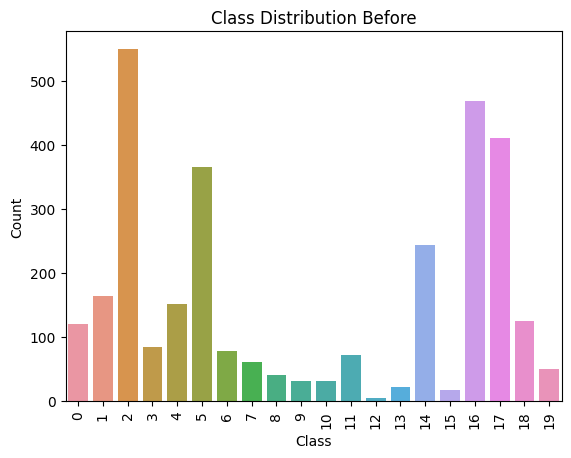

In [16]:
dispersion.view(y_train_padded, "Class Distribution Before")

In [17]:
X_train_resampled = X_train
y_train_resampled = y_train

[120, 164, 550, 84, 151, 365, 78, 61, 40, 31, 31, 72, 4, 22, 244, 17, 468, 411, 125, 50]


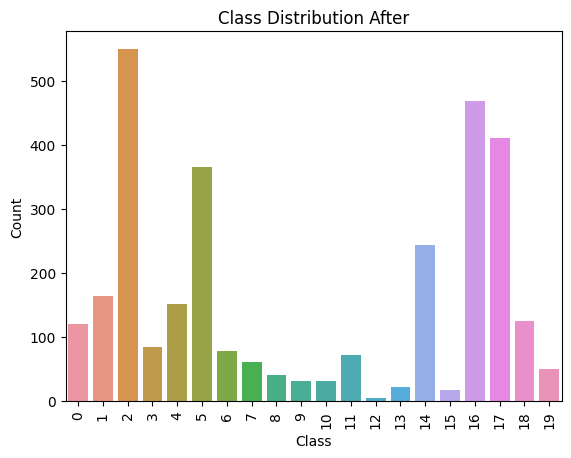

In [18]:
# Visualizzazione della distribuzione delle classi
dispersion.view(y_train_padded, "Class Distribution After")

In [19]:
# Creazione del modello
model = Sequential()

# LSMT
# model.add(Embedding(input_dim=max_len_features, output_dim=500, input_length=X_train_resampled.shape[1]))
# model.add(LSTM(32, dropout=0.5, recurrent_dropout=0.2, return_sequences=True))
# model.add(LSTM(32, dropout=0.5, recurrent_dropout=0.2))
# model.add(Dropout(0.5))
# model.add(Dense(20, activation='sigmoid'))

# GRU
model.add(Embedding(input_dim=max_len_features, output_dim=500, input_length=X_train_resampled.shape[1]))
model.add(GRU(64, dropout=0.4, recurrent_dropout=0.2, return_sequences=True))
model.add(GRU(32, dropout=0.4, recurrent_dropout=0.2))
model.add(Dropout(0.4))
model.add(Dense(20, activation='sigmoid'))

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1000, 500)         500000    
                                                                 
 gru_2 (GRU)                 (None, 1000, 64)          108672    
                                                                 
 gru_3 (GRU)                 (None, 32)                9408      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 20)                660       
                                                                 
Total params: 618740 (2.36 MB)
Trainable params: 618740 (2.36 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
# Compilazione del modello
# model.compile(loss='binary_crossentropy', optimizer='adam',
#               metrics=['accuracy', mx.f1_m, mx.precision_m, mx.recall_m])

model.compile(loss='categorical_crossentropy', optimizer='rmsprop',
              metrics=['accuracy', mx.f1_m, mx.precision_m, mx.recall_m])

In [22]:
# Addestramento del modello
history = model.fit(X_train_resampled, y_train_resampled, validation_data=(X_test, y_test), epochs=5)

Epoch 1/5
25/25 [==============================] - 43s 2s/step - loss: 70.2495 - accuracy: 0.4175 - f1_m: 0.4290 - precision_m: 0.2735 - recall_m: 0.9983 - val_loss: 54.2058 - val_accuracy: 0.4700 - val_f1_m: 0.4529 - val_precision_m: 0.2929 - val_recall_m: 1.0000
Epoch 2/5
25/25 [==============================] - 41s 2s/step - loss: 66.8465 - accuracy: 0.4375 - f1_m: 0.4833 - precision_m: 0.3193 - recall_m: 1.0000 - val_loss: 52.7401 - val_accuracy: 0.4700 - val_f1_m: 0.5358 - val_precision_m: 0.3661 - val_recall_m: 1.0000
Epoch 3/5
25/25 [==============================] - 41s 2s/step - loss: 65.5018 - accuracy: 0.4275 - f1_m: 0.5290 - precision_m: 0.3602 - recall_m: 1.0000 - val_loss: 52.7446 - val_accuracy: 0.4700 - val_f1_m: 0.5358 - val_precision_m: 0.3661 - val_recall_m: 1.0000
Epoch 4/5
25/25 [==============================] - 40s 2s/step - loss: 63.7198 - accuracy: 0.4250 - f1_m: 0.5723 - precision_m: 0.4013 - recall_m: 1.0000 - val_loss: 52.9564 - val_accuracy: 0.4700 - val_f1

In [23]:
# Valutazione del modello
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)
print("F1 Score:", f1_score)
print("Precision:", precision)
print("Recall:", recall)

7/7 [==============================] - 2s 221ms/step - loss: 53.2197 - accuracy: 0.4700 - f1_m: 0.6558 - precision_m: 0.4881 - recall_m: 1.0000
Loss: 53.21967697143555
Accuracy: 0.4699999988079071
F1 Score: 0.6558021306991577
Precision: 0.488095223903656
Recall: 1.0
